In [1]:
!pip install pivottablejs

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
#import plotly.graph_objs as go
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from pivottablejs import pivot_ui

In [3]:
data = pd.read_csv(r"file:///F:\Live%20Projects\HR_Analytics.csv")
data.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0


In [4]:
data.shape

(19158, 14)

In [5]:
data.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [6]:
data.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                      int64
dtype: object

In [7]:
#plt.figure(figsize=(5,5))
#sns.pairplot(data, hue='target', markers = ['s', 'o'])
#plt.show()

In [8]:
data.corr()

,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.040455,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.001920,-0.341665
training_hours,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


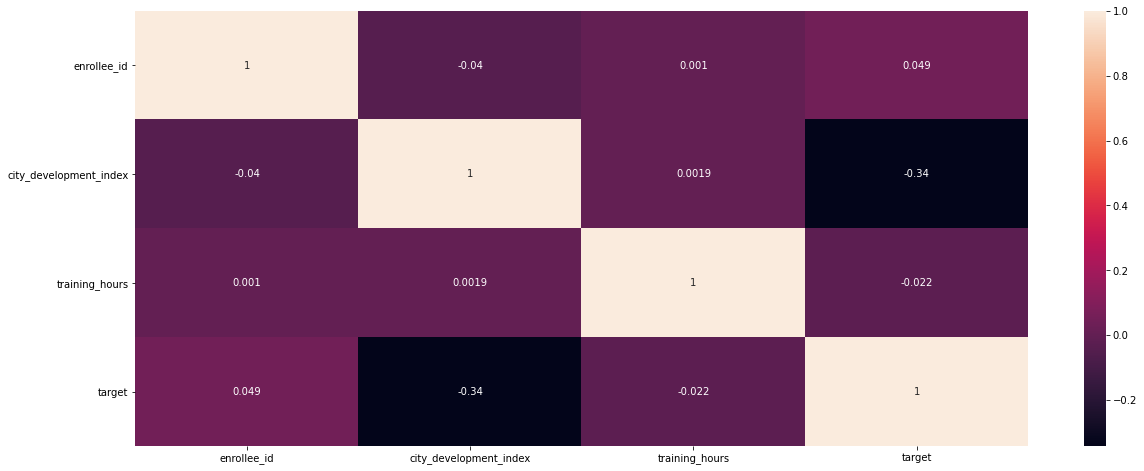

In [9]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),annot = True)
plt.show()

In [10]:
def pie_chart(data,col):
    targets = list(data[col].value_counts().index)
    values = list((data[col].value_counts()*100/len(data[col])).values)
    fig = px.pie(values=values, names=targets,color_discrete_sequence=['darkcyan', 'lawngreen'],title=col)
    fig.show()

In [11]:
categorical_columns = list(data.select_dtypes(include=['object']).dtypes.index)
print(categorical_columns)

['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']


In [12]:
#for col in categorical_columns:
    #pie_chart(data,col)

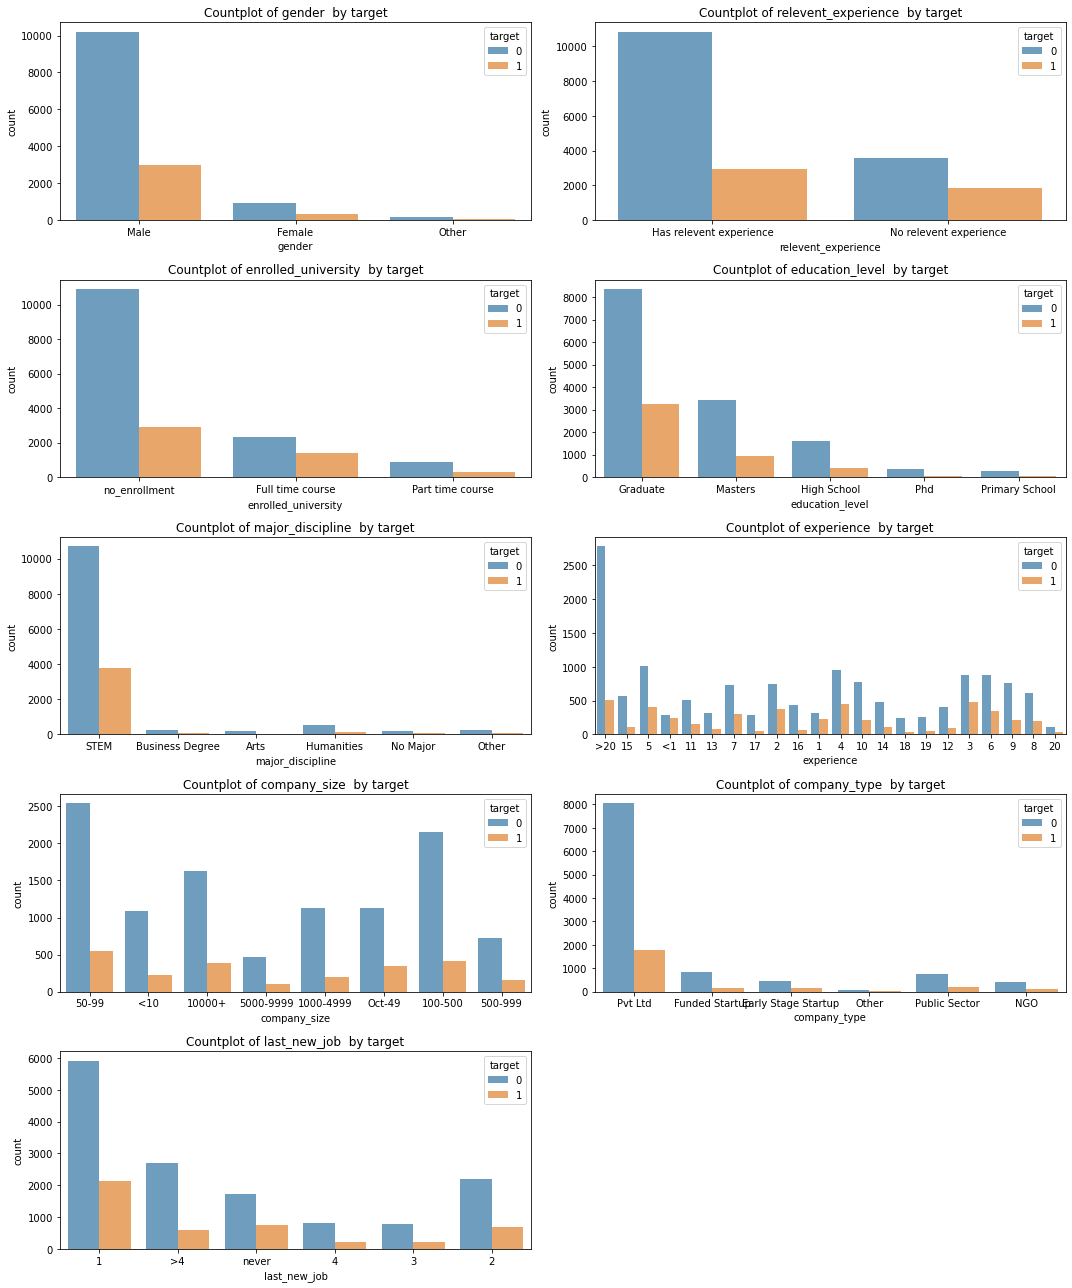

In [13]:
#Bar plots - Check frequency of feature wrt TV 

plt.figure(figsize=[15,18])
features = ['gender','relevent_experience','enrolled_university','education_level', 
            'major_discipline', 'experience','company_size','company_type','last_new_job']
n=1
for f in features:
    plt.subplot(5,2,n)
    sns.countplot(x=f, hue='target', alpha=0.7, data=data)
    plt.title("Countplot of {}  by target".format(f))
    n=n+1
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='target', ylabel='training_hours'>

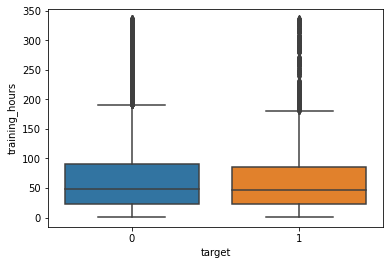

In [14]:
sns.boxplot(y='training_hours',x='target',data=data)

<AxesSubplot:xlabel='target', ylabel='city_development_index'>

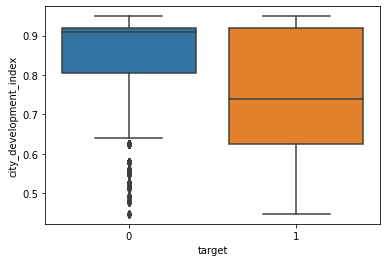

In [15]:
sns.boxplot(x='target',y='city_development_index',data=data)

<AxesSubplot:xlabel='major_discipline,education_level'>

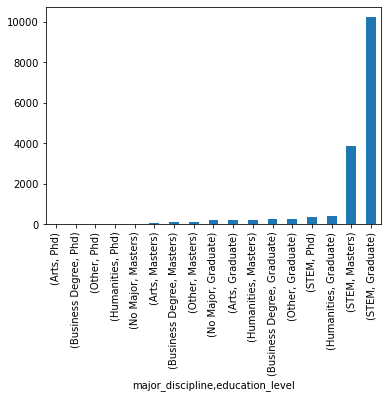

In [16]:
data[['major_discipline', 'education_level']].value_counts().sort_values().plot(kind='bar')

In [17]:
numeric_columns = list(data.select_dtypes(exclude=['object']).dtypes.index)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'skew: 1.8190947994281477')

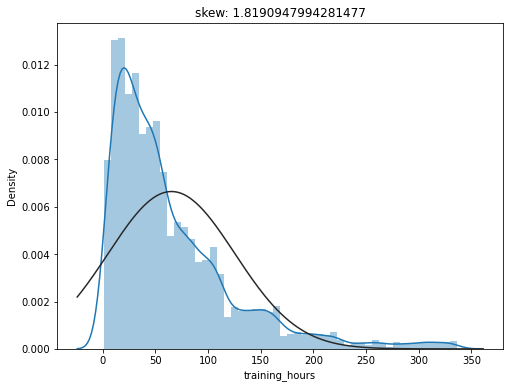

In [18]:
plt.figure(figsize=(8,6))
sns.distplot(data['training_hours'],fit=norm)
plt.title('skew: {}'.format(skew(data['training_hours'])))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


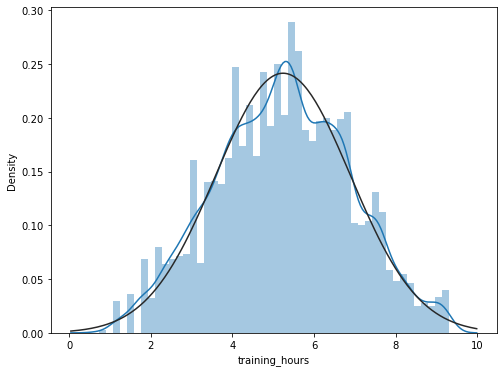

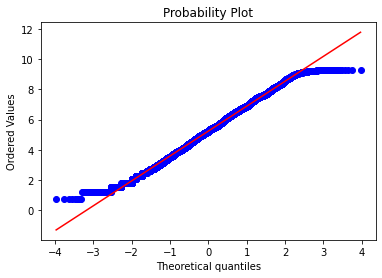

skew: -0.0006093163913336525


In [19]:
data['training_hours'] = boxcox1p(data['training_hours'], 0.15)
plt.figure(figsize=(8,6))
sns.distplot(data['training_hours'], fit = norm)
plt.show()
stats.probplot(data['training_hours'], plot = plt)
plt.show()
print('skew: {}'.format(skew(data['training_hours'])))

In [20]:
data.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4498
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [21]:
data.gender.isna().sum()

4498

In [22]:
data.gender.value_counts()

Male      13216
Female     1253
Other       191
Name: gender, dtype: int64

In [23]:
data.major_discipline.value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [24]:
data.gender = data.gender.fillna('Male')

In [25]:
data.education_level = data.education_level.fillna(method='ffill')
#forward fill
#backward fill

In [26]:
data.major_discipline = data.major_discipline.fillna('STEM') #mode

In [27]:
data.experience = data.experience.fillna(method='ffill')

In [28]:
data.company_size = data.company_size.fillna(method = 'ffill')

In [29]:
data.enrolled_university = data.enrolled_university.fillna('no_enrollment') #mode

In [30]:
data.company_type = data.company_type.fillna('Pvt Ltd') #mode

In [31]:
data.last_new_job = data.last_new_job.fillna(method = 'bfill')

In [32]:
le = LabelEncoder()
data.gender = le.fit_transform(data['gender'])

In [33]:
data.relevent_experience = le.fit_transform(data['relevent_experience'])

In [34]:
data.enrolled_university = le.fit_transform(data['enrolled_university'])

In [35]:
ordinal_education_level = {'Primary School':0, 'High School':1, 'Graduate':2, 'Masters':3, 'Phd':4}
data.education_level = data.education_level.map(ordinal_education_level)

In [36]:
data.major_discipline = le.fit_transform(data['major_discipline'])

In [37]:

ordinal_experience = {'<1':0, '1':1, '2':2, '3':3, '4':4, '5':5, 
                      '6':6, '7':7, '8':8, '9':9, '10':10,
                      '11':11, '12':12, '13':13, '14':14, 
                      '15':15, '16':16, '17':17, '18':18, '19':19, '20':20, '>20':21}
data.experience = data.experience.map(ordinal_experience)

In [38]:
ordinal_company_size = {'<10':0, '10/49':1, '50-99':2, '100-500':3, 
                        '500-999':4, '1000-4999':5, '5000-9999':6, '10000+':7}
data.company_size = data.company_size.map(ordinal_company_size)

In [39]:
data.company_type = le.fit_transform(data['company_type'])

In [40]:
ordinal_last_new_job = {'never':0, '1':1, '2':2, '3':3, '4':4, '>4':5}
data.last_new_job = data.last_new_job.map(ordinal_last_new_job)

In [41]:
data.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,1,0,2,2,5,21,NaN,5,1,4.792130,1
1,29725,city_40,0.776,1,1,2,2,5,15,2.0,5,5,5.248357,0


In [42]:
data.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline             0
experience                   0
company_size              2109
company_type                 0
last_new_job                 0
training_hours               0
target                       0
dtype: int64

In [43]:
data= data.drop('enrollee_id',axis=1)
data= data.dropna()

In [44]:
data.city

1         city_40
2         city_21
3        city_115
4        city_162
5        city_176
           ...   
19150    city_160
19151    city_149
19155    city_103
19156     city_65
19157     city_67
Name: city, Length: 17049, dtype: object

In [45]:
data.city = data.city.apply(lambda x: int(x.split('_')[1]))
data.city

1         40
2         21
3        115
4        162
5        176
        ... 
19150    160
19151    149
19155    103
19156     65
19157     67
Name: city, Length: 17049, dtype: int64

In [46]:
from scipy import stats
z = np.abs(stats.zscore(data[['city_development_index', 'training_hours']]))
print(z)

[[0.44880903 0.00618076]
 [1.69246043 0.6373306 ]
 [0.34244411 0.11411333]
 ...
 [0.72938702 0.06325861]
 [0.23607919 0.82069669]
 [0.19756242 1.14858512]]


In [47]:
threshold = 3
print(np.where(z > 3))

(array([ 1357,  4224,  4465,  4697,  4968,  5473,  6917,  7046,  8162,
        9292, 13457, 14729, 14933, 16074], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))


In [48]:
data1 = data[(z < 3).all(axis=1)]

In [49]:
data1.shape

(17035, 13)

0    12893
1     4142
Name: target, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='count'>

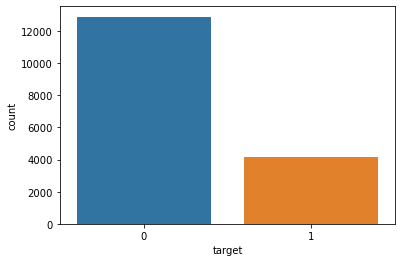

In [50]:
print(data1['target'].value_counts())
sns.countplot(data1['target'])

up sampling- minority class is upsampled - SMOTE - Synthetic Minority Oversampling technique 

down sampling - credit card fraud 492 / 492 


In [51]:
y = data1.target
X = data1.drop('target',axis=1)
#sm = SMOTE(random_state=42)
#X, y = sm.fit_resample(X,y)

In [52]:
from imblearn.over_sampling import SMOTE #generating synthetic samples of the minority class 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [53]:
num_before = dict(Counter(y))

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

#Tthe numbers after SMOTE
num_after =dict(Counter(y_smote))

In [54]:
print(num_before, num_after)

{0: 12893, 1: 4142} {0: 12893, 1: 12893}


In [55]:
after_smote=list(num_after.values())
after_smote.reverse()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


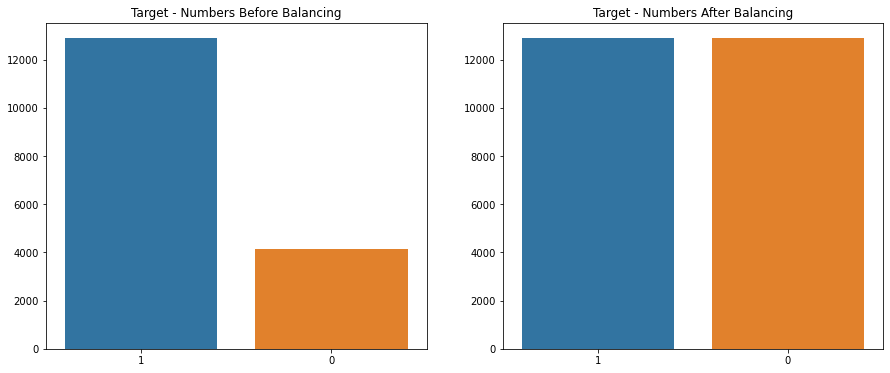

In [56]:
labels = ["1","0"]
labels1 = ["1","0"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(labels, list(num_before.values()))
plt.title("Target - Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(labels, after_smote)
plt.title("Target - Numbers After Balancing")
plt.show()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=42)

In [58]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
models = []
models.append(('Logistic Regression' ,LogisticRegression(random_state=42)))
models.append(('Naive bayes', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 42)))
models.append(('Random Forest', RandomForestClassifier(random_state = 42)))
models.append(('SVM', SVC(gamma='auto', random_state = 42)))
models.append(('XGBoost', GradientBoostingClassifier(random_state = 42)))
models.append(('GradientBoosting', GradientBoostingClassifier(random_state = 42)))
results = []
names = []

In [61]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score

In [62]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print("{} : {}".format(name,accuracy))

Logistic Regression : 0.7558112232918526
Naive bayes : 0.7532284573843625
KNN : 0.7358534867339751
CART : 0.6797370274712374
Random Forest : 0.7473585348673397
SVM : 0.7482977224700634
XGBoost : 0.7694294435313453
GradientBoosting : 0.7694294435313453


In [63]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = precision_score(y_test, y_pred)
        print("{} : {}".format(name,accuracy))

Logistic Regression : 0.5382830626450116
Naive bayes : 0.5107003891050583
KNN : 0.46285714285714286
CART : 0.3604985618408437
Random Forest : 0.49770290964777947
SVM : 1.0
XGBoost : 0.5643564356435643
GradientBoosting : 0.5643564356435643


In [64]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = recall_score(y_test, y_pred)
        print("{} : {}".format(name,accuracy))

Logistic Regression : 0.21621621621621623
Naive bayes : 0.48928238583411
KNN : 0.3019571295433364
CART : 0.3504193849021435
Random Forest : 0.30288909599254427
SVM : 0.0009319664492078285
XGBoost : 0.3718546132339236
GradientBoosting : 0.3718546132339236


In [65]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = f1_score(y_test, y_pred)
        print("{} : {}".format(name,accuracy))

Logistic Regression : 0.30851063829787234
Naive bayes : 0.4997620180866254
KNN : 0.36548223350253806
CART : 0.3553875236294896
Random Forest : 0.3765932792584009
SVM : 0.00186219739292365
XGBoost : 0.44831460674157303
GradientBoosting : 0.44831460674157303


In [66]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = confusion_matrix(y_test, y_pred)
        print("{} : {}".format(name,accuracy))

Logistic Regression : [[2987  199]
 [ 841  232]]
Naive bayes : [[2683  503]
 [ 548  525]]
KNN : [[2810  376]
 [ 749  324]]
CART : [[2519  667]
 [ 697  376]]
Random Forest : [[2858  328]
 [ 748  325]]
SVM : [[3186    0]
 [1072    1]]
XGBoost : [[2878  308]
 [ 674  399]]
GradientBoosting : [[2878  308]
 [ 674  399]]


In [67]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rfpred = rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      3186
           1       0.56      0.37      0.45      1073

    accuracy                           0.77      4259
   macro avg       0.69      0.64      0.65      4259
weighted avg       0.75      0.77      0.75      4259



In [68]:
y_pred = model.predict_proba(X_test)
print(y_pred)

[[0.78552308 0.21447692]
 [0.67703987 0.32296013]
 [0.31128071 0.68871929]
 ...
 [0.93117889 0.06882111]
 [0.8131438  0.1868562 ]
 [0.78630188 0.21369812]]


In [69]:
print(model.feature_importances_)

[0.0309044  0.71939634 0.0026387  0.05980025 0.03876934 0.0403664
 0.00762396 0.03111362 0.00531416 0.02193882 0.01159047 0.03054354]


In [70]:
importances = model.feature_importances_
features = data.columns[:12]
imp = pd.DataFrame({'Features': features, 'Importance': importances})
imp['Sum Importance'] = imp['Importance'].cumsum()
imp = imp.sort_values(by = 'Importance')
imp

,Features,Importance,Sum Importance
2,gender,0.002639,0.752939
8,company_size,0.005314,0.935927
6,major_discipline,0.007624,0.899499
10,last_new_job,0.011590,0.969456
9,company_type,0.021939,0.957866
11,training_hours,0.030544,1.000000
0,city,0.030904,0.030904
7,experience,0.031114,0.930613
4,enrolled_university,0.038769,0.851509
5,education_level,0.040366,0.891875


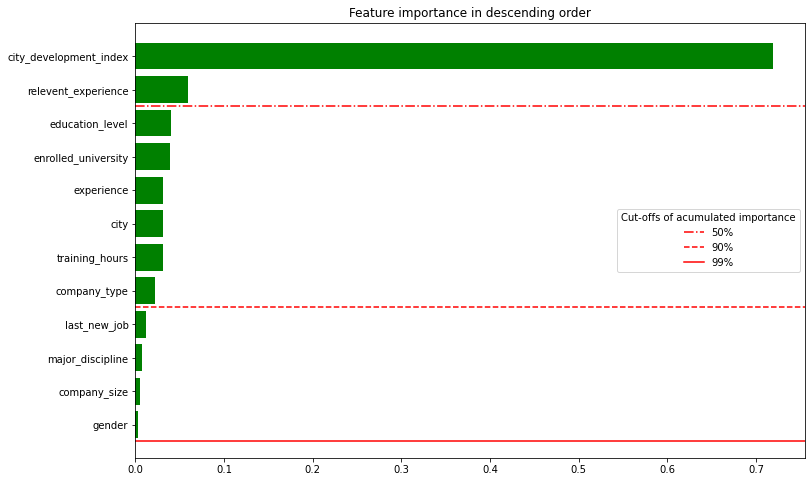

In [71]:
plt.figure(figsize=(12,8))
plt.barh(imp['Features'], imp['Importance'], color = 'g')
l1 = plt.axhline(len(imp) - (len(imp['Features'][imp['Sum Importance'] < 0.50]) + 1.5), linestyle='-.', color = 'r')
l2 = plt.axhline(len(imp) - (len(imp['Features'][imp['Sum Importance'] < 0.90]) + 1.5), linestyle='--', color = 'r')
l3 = plt.axhline(len(imp) - (len(imp['Features'][imp['Sum Importance'] < 0.99]) + 1.5), linestyle='-', color = 'r')
plt.legend(title = 'Cut-offs of acumulated importance', handles=(l1, l2, l3), labels = ('50%', '90%', '99%'))
plt.title('Feature importance in descending order')
plt.show()
